# Diabetes Prediction model with SVM

# Objective:
Develop an efficient SVM model to predict diabetes based on diagnostic features, focusing on data preprocessing, feature scaling, model evaluation, and visualization for insights and performance improvement.

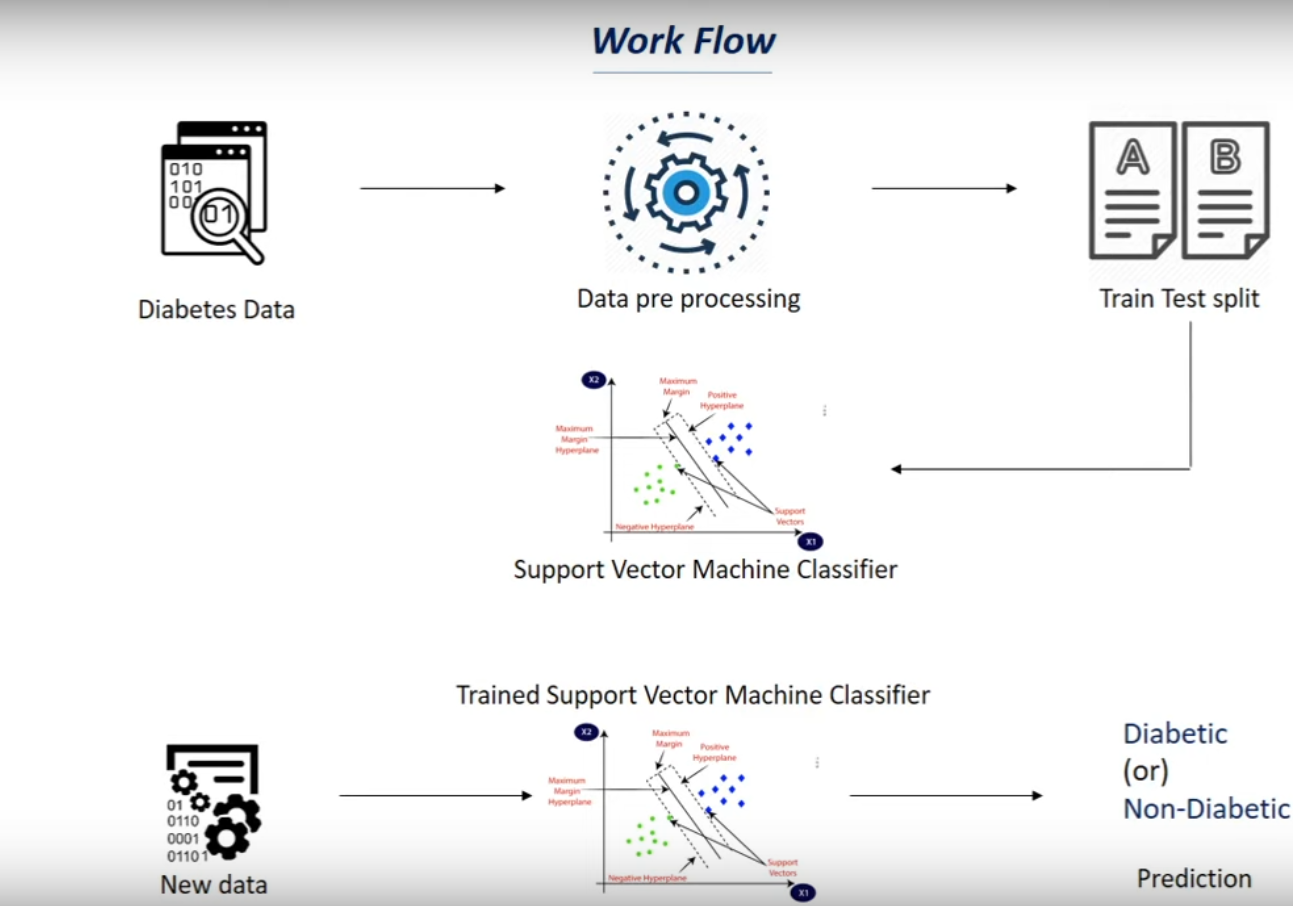

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [79]:
# load dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dataset Description

The dataset consists of 768 observations and 9 attributes:

    Pregnancies: Number of times pregnant.
    Glucose: Plasma glucose concentration.
    BloodPressure: Diastolic blood pressure (mm Hg).
    SkinThickness: Triceps skinfold thickness (mm).
    Insulin: 2-Hour serum insulin (mu U/ml).
    BMI: Body Mass Index.
    DiabetesPedigreeFunction: A function that scores likelihood of diabetes based on family history.
    Age: Age in years.
    Outcome: Diabetes outcome (1 = diabetes, 0 = no diabetes).

In [80]:
# display number and columns of datasets

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 768
Number of columns: 9


In [81]:
# statistical measures of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Key Insights from Statistics

    Count: Total data points for each column (n=768n=768).
    Mean & Std:
        Mean: Average values (e.g., Glucose mean = 120.9120.9).
        Std (Standard Deviation): Spread of values around the mean.
    Min & Max: Range of values in each column (e.g., Age: 21−8121−81).
    Quartiles:
        25% (Q1): Lower quartile (25% of data below this value).
        50% (Median): Middle value (e.g., Median Glucose = 117117).
        75% (Q3): Upper quartile (75% of data below this value).

Important Observations

    Zeros in Medical Fields:
        Many columns (e.g., Glucose, BloodPressure, SkinThickness, Insulin, BMI) have minimum values of 0, which are likely invalid or missing data that should be imputed or handled.
    Outliers:
        High maximum values (e.g., Insulin 846846) suggest the presence of outliers.
    Imbalance in Outcome:
        Mean of Outcome (0.350.35) shows imbalance (more non-diabetic cases).

Non-Diabetic (0): 500
Diabetic (1): 268


<Axes: title={'center': 'Diabetic vs Non-Diabetic Cases'}, xlabel='Outcome', ylabel='Number of Cases'>

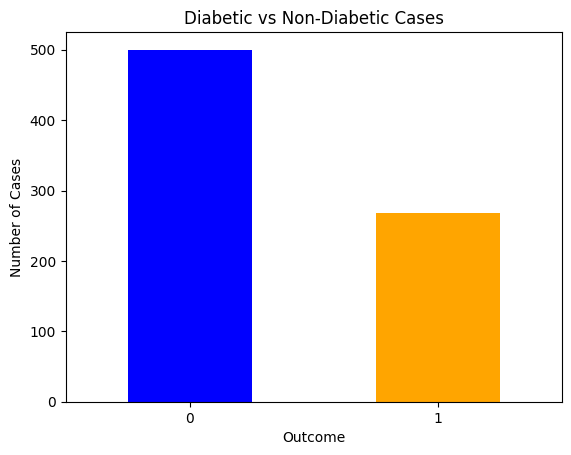

In [82]:
# Value counts for the 'Outcome' column
outcome_counts = df['Outcome'].value_counts()

# Print the counts
print("Non-Diabetic (0):", outcome_counts[0])
print("Diabetic (1):", outcome_counts[1])
# plot in bar plot
df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'orange'], title='Diabetic vs Non-Diabetic Cases', xlabel='Outcome', ylabel='Number of Cases', rot=360)
# put labels on top plots



In [83]:
# calculate mean value for outcomes and group by in mean
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


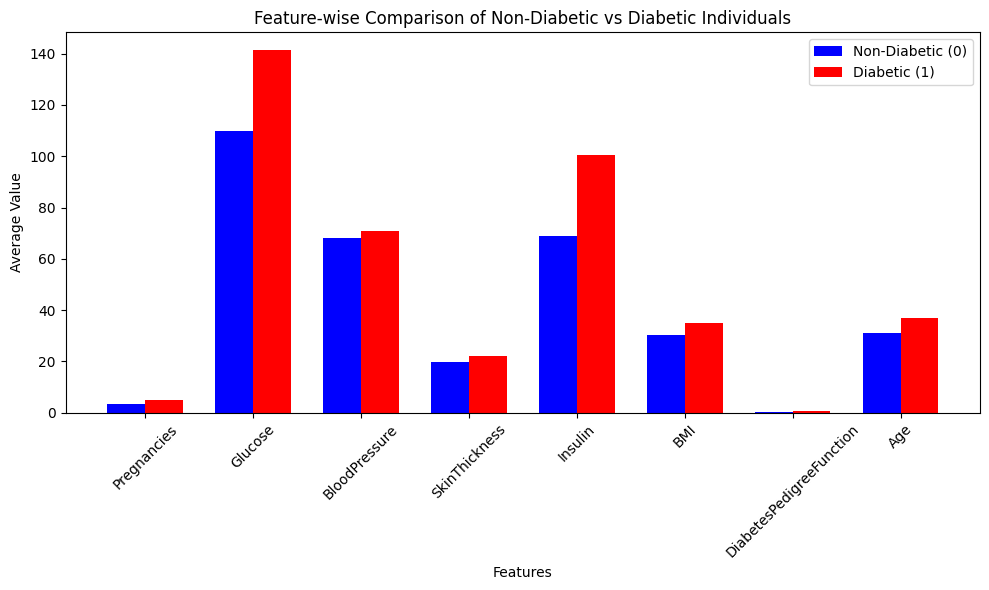

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe and it contains the necessary columns.

# Group by 'Outcome' and calculate the mean for each feature
mean_values = df.groupby('Outcome').mean()

# Plot feature-wise comparison
features = mean_values.columns
non_diabetic = mean_values.loc[0].values
diabetic = mean_values.loc[1].values

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(features))

# Plot the bars
bar1 = ax.bar(index, non_diabetic, bar_width, label='Non-Diabetic (0)', color='b')
bar2 = ax.bar([i + bar_width for i in index], diabetic, bar_width, label='Diabetic (1)', color='r')

# Add labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Average Value')
ax.set_title('Feature-wise Comparison of Non-Diabetic vs Diabetic Individuals')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(features, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


# ey Insights for the Plot:

    Pregnancies: Diabetic individuals have had more pregnancies on average, suggesting a possible correlation with diabetes.
    Glucose: Diabetic individuals have significantly higher glucose levels, indicating its critical role in diabetes detection.
    BloodPressure: Slightly higher blood pressure in diabetics, but the difference is not as pronounced.
    SkinThickness: Diabetics tend to have slightly thicker skinfolds, possibly indicating higher fat levels.
    Insulin: Average insulin levels are notably higher in diabetics, reflecting its importance in glucose regulation.
    BMI: Higher BMI among diabetics, supporting the link between obesity and diabetes.
    DiabetesPedigreeFunction: Diabetics have a higher Diabetes Pedigree Function, suggesting a stronger genetic predisposition.
    Age: Diabetics are, on average, older, reflecting age as a potential risk factor for diabetes.

In [85]:
# seprate features other then outcome
# seprate data and labels

X = df.drop('Outcome', axis=1) # drop outcome column
y = df['Outcome'] # storing outcome column in variable y

print(X) # print first 5 rows of X
# u can see outcome dropped

# see y

 # print first 5 rows of y

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [86]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [87]:
# Data Preprocessing - Standardization
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
scaler.fit(X)

# Fit and transform the data
X = scaler.fit_transform(X)

In [88]:
# print X in columns with names of it

pd.DataFrame(X, columns=df.columns[:-1])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [89]:
# split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

In [90]:
# # display shape of original dataset,train and test datasets
print(X.shape, X_train.shape, X_test.shape)

# Printing the shape of the full feature set (X), training set (X_train), and test set (X_test)
print("Shape of the full feature set (X):", X.shape)   # Shape of the entire feature dataset
print("Shape of the training set (X_train):", X_train.shape)  # Shape of the training data
print("Shape of the test set (X_test):", X_test.shape)   # Shape of the test data


(768, 8) (614, 8) (154, 8)
Shape of the full feature set (X): (768, 8)
Shape of the training set (X_train): (614, 8)
Shape of the test set (X_test): (154, 8)


In [91]:
# Training the model
classifier = svm.SVC(kernel='linear') 


In [92]:
# train the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [93]:
# Evaluating the model
# accuracy score on the training data
from sklearn.metrics import accuracy_score


# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [94]:
print('Accuracy score of the training data: {:.2f}'.format(training_data_accuracy))
print(f'Accuracy score of the training data: {training_data_accuracy * 100:.2f}%')


Accuracy score of the training data: 0.79
Accuracy score of the training data: 78.66%


# 0.79 means that your model correctly predicted the outcome 79% of the time. This is typically a good result, especially when the model is being trained on complex data, but its sufficiency depends on the specific problem you're addressing.

In [95]:
# accuracy on test data model

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [96]:
print('Accuracy score of the testing data: {:.2f}'.format(test_data_accuracy))
print(f'Accuracy score of the testing data: {test_data_accuracy * 100:.2f}%')

Accuracy score of the testing data: 0.77
Accuracy score of the testing data: 77.27%


In [97]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [98]:
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Example input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert the input data to a NumPy array and reshape for prediction
input_data_reshaped = np.array(input_data).reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Predict the outcome using the trained model
prediction = classifier.predict(std_data)

# Output prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is diabetic
